In [2]:
!pip install matplotlib

import pandas as pd
import glob 
import matplotlib.pyplot as plt
import numpy as np
  
raw_data_path = '../data/raw'
file_list = glob.glob(raw_data_path + "/*.csv") 

     ---------------------------------------- 0.0/106.6 kB ? eta -:--:--
     ---------- -------------------------- 30.7/106.6 kB 660.6 kB/s eta 0:00:01
     --------------------- --------------- 61.4/106.6 kB 825.8 kB/s eta 0:00:01
     ---------------------------------- - 102.4/106.6 kB 991.0 kB/s eta 0:00:01
     ------------------------------------ 106.6/106.6 kB 688.1 kB/s eta 0:00:00
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB 2.0 MB/s eta 0:00:04
    --------------------------------------- 0.1/8.1 MB 1.7 MB/s eta 0:00:05
    --------------------------------------- 0.2/8.1 MB 1.5 MB/s eta 0:00:06
   - -------------------------------------- 0.2/8.1 MB 1.4 MB/s eta 0:00:06
   - -------------------------------------- 0.3/8.1 MB 1.4 MB/s eta 0:00:06
   - -------------------------------------- 0.3/8.1 MB 1.4 MB/s eta 0:00:06
   - -----------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
file_list

['../data/raw\\1_2025-05-12_19-28.csv',
 '../data/raw\\1_2025-05-12_20-00.csv',
 '../data/raw\\1_2025-05-12_20-16.csv']

In [4]:
main_dataframe = pd.read_csv(file_list[0])
for i in range(1, len(file_list)): 
    data = pd.read_csv(file_list[i]) 
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0) 

In [5]:
main_dataframe


,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,ID 12891703,homeowner,https://www.cian.ru/sale/flat/315747133/,Москва,sale,flat,10,18,1,32.0,-1,0,13590000,Останкинский,Березовая аллея,19к1,Ботанический сад,Апарт-комплекс Легендарный квартал
1,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/313640113/,Москва,sale,flat,6,41,1,40.1,-1,0,35500000,Хорошевский,Ленинградский проспект,37/5,Аэропорт,Прайм Парк
2,OPN PARTNER,real_estate_agent,https://www.cian.ru/sale/flat/310107816/,Москва,sale,flat,6,12,1,40.0,-1,0,8490000,NaN,Харлампиева,52к1,Филатов Луг,Спортивный квартал
3,Юрий Артамонов,realtor,https://www.cian.ru/sale/flat/316989525/,Москва,sale,flat,5,12,1,35.1,-1,0,15950000,Даниловский,Сайкина,2,Автозаводская,NaN
4,Татьяна Серебрякова,realtor,https://www.cian.ru/sale/flat/314672030/,Москва,sale,flat,14,16,1,40.0,-1,0,12700000,Марьино,Новомарьинская,16К1,Братиславская,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,Ирина Василевская,realtor,https://www.cian.ru/sale/flat/307275502/,Москва,sale,flat,2,12,1,41.0,-1,0,11500000,Соколиная гора,Вольная,4,Семёновская,NaN
52,Артур Лихой,realtor,https://www.cian.ru/sale/flat/317172600/,Москва,sale,flat,4,9,1,33.0,-1,0,14900000,Академический,Большая Черемушкинская,2К1,Крымская,NaN
53,CENTURY 21 Level,real_estate_agent,https://www.cian.ru/sale/flat/317192849/,Москва,sale,flat,8,10,1,31.1,-1,0,12900000,Раменки,3-й Сетуньский проезд,3,Поклонная,NaN
54,Private Broker,real_estate_agent,https://www.cian.ru/sale/flat/317218324/,Москва,sale,flat,10,41,1,65.9,-1,0,31963000,Пресненский,Шмитовский проезд,39к8,Москва-Сити,Headliner


In [6]:
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])
new_dataframe = main_dataframe[['url_id', 'total_meters', 'price']].set_index('url_id')

<Axes: >

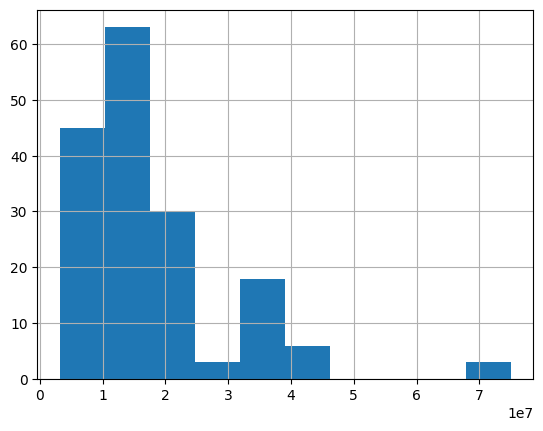

In [7]:
new_dataframe['price'].hist()

In [8]:
new_df = new_dataframe[new_dataframe['price'] < 100_000_000]
new_df = new_df[new_df['total_meters'] < 100]

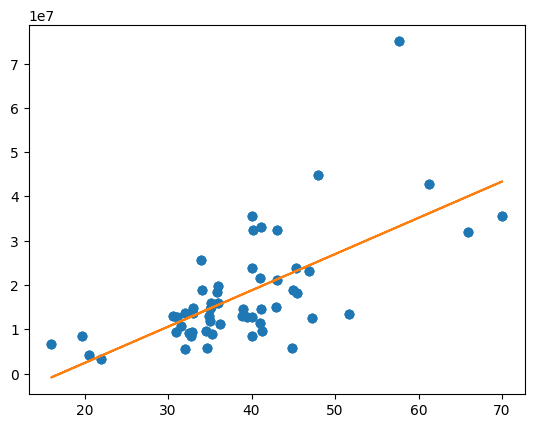

In [9]:
x = new_df['total_meters']
y = new_df['price']

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)

In [10]:
new_df.to_csv('../data/processed/train.csv', index=False)